In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [77]:
df = pd.read_csv("data/data_with_features.csv")

## 1. Data Profiling:

In [78]:
df.shape

(3690, 52)

In [79]:
#pd.set_option('display.max_columns', None)
df

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters,First_Third_Match,is_sequence,Contains_Tribe,contains_special_words,contains_special_cars,connect_12,connect_23,combined_word,word_freq_score,first_name_rank,result
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رهم,8.757550,0.000000,True
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رهم,8.757550,0.000000,True
2,ر ه م,Z H R,ر,ه,م,R,H,Z,9666,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رهم,8.757550,0.000000,True
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رأن,44.089733,80.505952,True
4,ه ر ب,B R H,ه,ر,ب,H,R,B,22,50000,NaN,2,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,هرب,62.381363,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,ه م ن,N Z H,ه,م,ن,H,Z,N,203,20000,NaN,3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,همن,13.201035,0.000000,False
3686,د ص ع,E X D,د,ص,ع,D,X,E,2,40000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,دصع,0.000000,0.000000,True
3687,ب ى ى,V V B,ب,ى,ى,B,V,V,505,50000,NaN,3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,بىى,14.020708,10.379464,False
3688,ر ع ب,B E R,ر,ع,ب,R,E,B,3533,15000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رعب,72.088007,37.388393,True


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   char_ar                   3690 non-null   object 
 1   char_en                   3690 non-null   object 
 2   char1_ar                  3690 non-null   object 
 3   char2_ar                  3685 non-null   object 
 4   char3_ar                  3677 non-null   object 
 5   char1_en                  3690 non-null   object 
 6   char2_en                  3685 non-null   object 
 7   char3_en                  3677 non-null   object 
 8   plate_no                  3690 non-null   int64  
 9   price                     3690 non-null   int64  
 10  class                     54 non-null     object 
 11  plate_no_length           3690 non-null   int64  
 12  similar_digits            3690 non-null   bool   
 13  sepcial_date              3690 non-null   bool   
 14  saudi_tr

In [81]:
df[df['price'] > 500000][['char_ar','plate_no','price']].sort_values('price')

,char_ar,plate_no,price
1304,د أ ى,1,550000
1461,س م ن,2,600000
3239,ب ر س,1,600000
1707,و ر د,771,610000
905,ر ن أ,3000,610000
2064,ك ى ط,6,650000
2649,د ح ط,999,700000
1348,ق ق ك,1,700000
3548,و ر ب,3,700000
1621,د ن ه,1,700000


### Data Quality Checks

In [11]:
df[(df['price'] < 500000) & (df['price'] > 400000)][['char_ar','plate_no','price']].sort_values('price').head(60)

,char_ar,plate_no,price
920,و ي و,1,420000
1594,د ل ع,666,450000
1192,ى ح ل,1,480000
1292,ح ك و,1,490000


In [12]:
df[(df['price'] < 400000) & (df['price'] > 300000)][['char_ar','plate_no','price']].sort_values('price').head(60)

,char_ar,plate_no,price
620,ط ك ص,1,320000
1626,ب ص ب,1,330000
416,ر ح ل,2030,350000
440,ع ر ل,1,350000
577,م س و,3,350000
1256,ع ل ه,1,350000
1482,ر ح ل,2030,350000
3347,ص ح أ,2,350000
1498,ك ى ى,8,360000
1206,و د ر,1,370000


In [13]:
df[(df['price'] < 300000) & (df['price'] > 200000)][['char_ar','plate_no','price']].sort_values('price').head(60)

,char_ar,plate_no,price
474,ح ح ح,16,220000
156,س م ى,9,250000
510,ب س س,11,250000
1473,ط ل س,6,250000
1871,س ح ب,10,250000
3119,ط ق س,3,250000


In [14]:
df[(df['price'] < 200000) & (df['price'] > 100000)][['char_ar','plate_no','price']].sort_values('price').head(10)

,char_ar,plate_no,price
342,ص م ن,6,102000
532,و ك س,2,105000
1443,ه ه ه,151,110000
1315,ن ط ى,6,110000
116,ص ى ب,2,110000
2585,د و ن,1,110000
2521,ه د د,2,110000
1494,ص ر ل,3,110000
692,ص ع د,9,115000
557,ح ر ع,8,115000


In [15]:
df[(df['price'] < 100000) & (df['price'] > 70000)][['char_ar','plate_no','price']].sort_values('price').head(10)

,char_ar,plate_no,price
1688,أ أ أ,7777,72000
628,ص ل م,9,73000
638,ن ق ب,5,75000
396,د ر ط,3,75000
259,ر ن أ,121,75000
1926,ى أ م,919,75000
215,ل ه ط,6,75000
3008,ح ق ل,9,75000
1303,ع و ق,4,75000
3403,ط ط ص,7,75000


In [16]:
df[(df['price'] < 70000) & (df['price'] > 50000)][['char_ar','plate_no','price']].sort_values('price').head(10)

,char_ar,plate_no,price
948,ع س ط,6,51000
851,ع و ر,8,52000
1022,ب ع و,4,52000
2883,و ن ر,7,52000
778,ه ع ر,7,53500
9,ص ى ن,11,55000
2881,س ح و,7,55000
2369,د ح ط,999,55000
2110,ن ك س,555,55000
479,ط ر ب,59,55000


- Filter by one digit plates

In [17]:
df[(df['Two Digits (Different)'] ) & (df['price'] < 12000)][['char_ar','plate_no','price']].sort_values('price').head(150).tail(50)

,char_ar,plate_no,price
2879,ر ط ك,61,8000
752,ب ن ل,54,8000
2511,ب ى ح,92,8000
3615,ل ط ى,37,8000
757,ن م د,96,8500
795,ه م ص,67,8900
852,ي ن م,84,9000
1698,ع ع ر,12,9000
1979,ر س ق,24,9000
2164,د ق ص,38,9000


In [18]:
df['char_en'][2955]

'K R S'

#### 1. Reliability:

In [19]:
# Data collected from the Saudi plate market:
# - https://mazad.absher.sa/
# - https://lu7ah.com/
# - https://www.raqmvip.com/
# - https://www.lohatk.sa/
# - https://www.mstaml.com/sa/market/%D8%A7%D9%84%D8%B3%D8%B9%D9%88%D8%AF%D9%8A%D8%A9/%D9%84%D9%88%D8%AD%D8%A7%D8%AA-%D8%B3%D9%8A%D8%A7%D8%B1%D8%A7%D8%AA-%D9%85%D9%85%D9%8A%D8%B2%D8%A9?location=30&type=4.47

#### 2. Timeliness: 


In [20]:
# up to date 

#### 3. Consistency:

In [21]:
# it's consistenc

#### 4. Relevance:


In [22]:
# sample matching our goal 

#### 5. Uniqueness: 

In [82]:
# Duplicated plate with same price 
df.duplicated().sum()

91

In [83]:
df.duplicated().sum()

91

In [84]:
df.duplicated(['char1_ar','char2_ar','char3_ar','char1_en','char2_en','char3_en','plate_no','price']).sum()

91

In [85]:
df.duplicated(['char1_ar','char2_ar','char3_ar','char1_en','char2_en','char3_en','plate_no']).sum()

315

In [86]:
# Check dublicated with same plate but with different price
# And take the highest price
df[df.sort_values(['price']).duplicated(['char1_ar', 'char2_ar', 'char3_ar', 'char1_en', 'char2_en', 'char3_en', 'plate_no'],keep='first')]

C:\Users\hamad\AppData\Local\Temp\ipykernel_35740\3628687061.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.sort_values(['price']).duplicated(['char1_ar', 'char2_ar', 'char3_ar', 'char1_en', 'char2_en', 'char3_en', 'plate_no'],keep='first')]


,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters,First_Third_Match,is_sequence,Contains_Tribe,contains_special_words,contains_special_cars,connect_12,connect_23,combined_word,word_freq_score,first_name_rank,result
0,ر ه م,Z H R,ر,ه,م,R,H,Z,9777,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رهم,8.757550,0.000000,True
1,ر ه م,Z H R,ر,ه,م,R,H,Z,9888,6500,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رهم,8.757550,0.000000,True
3,ر أ ن,N A R,ر,أ,ن,R,A,N,3,35000,NaN,1,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رأن,44.089733,80.505952,True
6,أ ر ب,B R A,أ,ر,ب,A,R,B,75,15500,NaN,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,أرب,33.951682,15.327381,True
22,ر ع د,D E R,ر,ع,د,R,E,D,3327,10000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رعد,64.710958,97.619048,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,ب ق و,U G B,ب,ق,و,B,G,U,9494,20000,NaN,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,بقو,19.262295,0.000000,False
3610,م ع أ,A E Z,م,ع,أ,Z,E,A,71,25000,NaN,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,معأ,89.689387,62.872024,False
3611,و س ه,H S U,و,س,ه,U,S,H,212,15000,NaN,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,وسه,0.000000,0.000000,True
3623,ه و و,U U H,ه,و,و,H,U,U,19,25000,NaN,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,هوو,16.781708,0.000000,False


In [87]:
df.shape

(3690, 52)

#### 6. Completeness: 

In [29]:
df.isnull().sum().sort_values(ascending=False)

class                       3636
combined_word                 13
char3_ar                      13
char3_en                      13
char2_ar                       5
char2_en                       5
one_digit_five                 0
one_digit_nine                 0
one_digit_eight                0
one_digit_seven                0
one_digit_six                  0
char_ar                        0
one_digit_four                 0
is_one_letters                 0
one_digit_three                0
one_digit_two                  0
is_triple_letters              0
Contains_Tribe                 0
First_Third_Match              0
is_sequence                    0
one_digit_zero                 0
contains_special_words         0
contains_special_cars          0
connect_12                     0
connect_23                     0
word_freq_score                0
first_name_rank                0
one_digit_one                  0
plaindromic_no                 0
same_two_sides                 0
Two Digits

#### 7. Check Accuracy:

In [88]:
# All columns all same datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   char_ar                   3690 non-null   object 
 1   char_en                   3690 non-null   object 
 2   char1_ar                  3690 non-null   object 
 3   char2_ar                  3685 non-null   object 
 4   char3_ar                  3677 non-null   object 
 5   char1_en                  3690 non-null   object 
 6   char2_en                  3685 non-null   object 
 7   char3_en                  3677 non-null   object 
 8   plate_no                  3690 non-null   int64  
 9   price                     3690 non-null   int64  
 10  class                     54 non-null     object 
 11  plate_no_length           3690 non-null   int64  
 12  similar_digits            3690 non-null   bool   
 13  sepcial_date              3690 non-null   bool   
 14  saudi_tr

## 2. Data Cleaning: 

In [89]:
# Deleate duplicated
df.drop_duplicates(inplace=True)

In [90]:
# Drop all plate withe digit 0
df = df[df['plate_no'] != 0]

In [92]:
# Drop all plate withe price > 1000
df = df[df['price'] >= 1000]

In [93]:
# get the outliers value indexes to drop it all 

outliers_plates = {
    # From 500K to 2M
    771:'و ر د',
    3000:'ر ن أ',
    999:'د ح ط',
    666:'و ط م',
    393:'ن أ ر',
    34:'د ح ق',
    1110:'ح ك ن',
    12:'و أ ط',
    8888:'د م د',
    7373:'ب و ق',
    555:'ن ل س',
    # From 100K - 200K
    20:'ع ر ن',
    40:'ى ن ح',
    # From 70K - 100K
    8149:'ح ط ى',
    1897:'ب ط ل',

    # From 50K - 70K
    7703:'ر ب ى',
    8099:'ح م د',
    5817:'ب د ر',
    5252:'ح ل م',
    1223:'ر ق ه',
    602:'ع ع س',
    5115:'أ ص م',
    7705:'ح ر ب',
    3614:'ح ر ب',
    9777:'ح ه ع',
    166:'ه ح ل',
    4321:'ب ي م',
    3509:'ح ر ب',
    1182:'أ ن ص',
    9998:'د و ط',
    2013:'ح ى أ',
    3614:'ح ر ب',
    3000:'ر ن ق',
    5353:'ح ل ك',
    8001:'أ ه ن',
    2719:'ح م د',
    13:'م ب ص',
    322:'ع ر ب',
    111:'د ع م',
    41:'ع ل م',
    4444:'ن و ح',
    342:'م ك ه',


    # One digit outlier
    7:'ل ل ل',
    4:'أ و ك',
    8:'و ه ب',
    9:'ن و ح',
    9:'ن د أ',
    8:'س ب ب',
    3:'ه ك ص',
    9:'ح ب ك',
    8:'ح و ر',
    7:'ع س ل',
    7:'أ أ م',
    9:'ن د أ',
    9:'ن ح و',
    9:'ن و ح',
    9:'ه ك ر',
    5:'ل ن أ',
    3:'ن س ق',
    6:'د أ ل',
    2:'ع ع و',
    6:'م ن ح',
    5:'س ر ب',
    3:'س ر ب',
    1:'ر ب ى',
    8:'ص ع ص',
    4:'و ر د',
    4:'ص ص ع',
    8:'ر ل ر',
    9:'ح ك ك',
    55:'ع س ل',
    88:'ق ب ب',
    77:'ح ر ب',
    11:'ر ك ل',
    88:'ط و ر',
    66:'ن ط ط',
    99:'ع س ل',
    77:'ق ى ع',
    22:'ع ه م',
    77:'ع س ل',
    22:'ق م ر',
    44:'س ن د',
    33:'س س س',
    44:'ن و ح',
    44:'و ك ر',
    44:'ه ب ب',
    99:'ع س ل',
    22:'ط ل ه',
    55:'ب ن ق',
    88:'م ق ن',
    11:'ر ع ب',
    11:'ه ل و',
    55:'ق ح ط',
    11:'ق ط أ',
    66:'س ب ع',
    22:'ك م ر',
    77:'ل ط و',
    66:'أ و ك',
    77:'ح ح ه',
    77:'أ أ أ',
    22:'ه ح ه',
    99:'ى ى ع',
    44:'ى ى ك',
    92:'و م ص',
    51:'ق ب ب',
    85:'أ أ أ',
    16:'ب ط م',
    17:'و ح أ',
    49:'ر ر س',
    41:'و ك ر',
    82:'ع د ع',
    65:'م م ن',
    62:'ل ه ه',
    10:'د ب ب',
    27:'د د ص',
    56:'ل ر ل',
    43:'ك ك ح',
    10:'و أ و',
    85:'أ أ أ',
    10:'س ح ح',
    38:'س أ د',
    13:'ه ل ع',
    58:'و ع و',
    62:'و و س',
    17:'ع ع ب',
    28:'ط ى ى',
    70:'أ أ س',
    93:'ر ع ب',
    79:'ح ق د',
    38:'ص ب ص',
    97:'ه ه و',
    40:'ص ق ر',
    70:'ل ل د',
    25:'ه ه ن',
    94:'ل م ل',
    1111:'ح ر م',
    9999:'ر م ك',
    555:'ص ب د',
    669:'و ب أ',
    771:'ص س ى',
    633:'و ه م',
    446:'و م ح',
    334:'ر ح ب',
    433:'ى ى ص',
    977:'و ط س',
    455:'م ك ق',
    844:'ه ل ه',
    700:'أ أ ط',
    330:'و ه ى',
    9277:'ح و ر',
    2777:'ر م ه',
    443:'ل ك ح',
    244:'ح م و',
    117:'ص م ك',
    288:'ن ص ن',
    9888:'أ ل د',
    441:'و ط و',
    3444:'ر ع ر',
    6111:'ب ق ل',
    855:'ق ى ط',
    8899:'ر ل ق',
    822:'م أ ر',
    9777:'ر ه م',
    1400:'ر ه م',
    330:'د م ع',
    446:'و م ح',
    7222:'د ع ح',
    9888:'ر ه م',
    8988:'د ر ع',
    366:'و د ع',
    4544:'ر ب د',
    855:'ى ب ص',
    533:'ق د أ',
    400:'ع ك ط',
    211:'ن ح ك',
    299:'و ك ك',
    555:'ص ب د',
    333:'أ د ى',
    999:'د د ط',
    777:'ص ط أ',
    333:'ع د ح',
    8212:'ح ل و',
    533:'د ع أ',
    4:'ب ى م',
    771:'و ر د',




    60:'م ن ه',
    727:'ى و ى',  
    519:'أ'

}
outliers_indexes = []
for no,p in outliers_plates.items():
    outliers_indexes.append(df[(df['char_ar'] == p) & (df['plate_no'] == no)].index[0])
outliers_plates = set(outliers_plates)
len(outliers_plates)


120

In [94]:
df.drop(outliers_indexes,inplace=True)

In [95]:
# Drop all plate withe price > 5,000000
df = df[df['price'] <= 500000]

In [96]:
df[df['price'] >= 1000000].sort_values('price')

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters,First_Third_Match,is_sequence,Contains_Tribe,contains_special_words,contains_special_cars,connect_12,connect_23,combined_word,word_freq_score,first_name_rank,result


In [38]:
df[df['One Digit']].sort_values('price')[['char_ar','plate_no','price']]

,char_ar,plate_no,price
1106,ل ل ل,7,17000
2743,ع ه م,5,19000
1141,د ه ب,8,20000
1729,ه ك ص,3,20000
1148,ن ح و,9,20000
...,...,...,...
1410,و أ أ,2,500000
1335,م ع ك,2,500000
497,س أ ى,1,500000
745,د ب س,1,500000


In [39]:
df.drop(df[(df['One Digit'] ) & (df['price'] <20000)].index,inplace=True)

In [40]:
df[df['Four Digits (Same)'] & (df['price'] > 17000)].sort_values('price').shape

(52, 52)

In [41]:
ind_to_drop = df[df['Four Digits (Same)'] & (df['price'] > 17000)].sort_values('price').index
df.drop(ind_to_drop,inplace=True)

- Four Digits (Different) Outlier

In [42]:
df[(df['Four Digits (Different)']) & (df['price'] > 12000)][['char_ar','plate_no','price']].shape

(18, 3)

In [43]:
ind_to_drop = df[(df['Four Digits (Different)']) & (df['price'] > 12000)][['char_ar','plate_no','price']].index
df.drop(ind_to_drop,inplace=True)

- Three Digits (Different) Outliers

In [44]:
df[(df['Three Digits (Different)']==True) & (df['price'] < 5000) ][['char_ar','plate_no','price']].sort_values('price').shape

(67, 3)

In [45]:
ind_to_drop = df[(df['Three Digits (Different)']==True) & (df['price'] < 5000) ][['char_ar','plate_no','price']].index
df.drop(ind_to_drop,inplace=True)

- Three Digits (Same) Outlier

In [46]:
df[(df['Three Digits (Same)'] == True) & (df['price'] <15000) ][['char_ar','plate_no','price']].sort_values('price')

,char_ar,plate_no,price
3031,ط ر ه,555,1000
2436,أ د ى,333,6000
2493,و ط م,666,9500
3264,ب ب ع,222,10000
3168,ع ب ب,222,10000
3032,ط ر ه,555,10000
1987,ص ق ص,222,10000
3006,س ى د,666,11000
2486,ه د ى,111,12000
3371,د ق ح,999,12000


In [47]:
ind_to_drop = df[(df['Three Digits (Same)'] == True) & (df['price'] <15000) ].index
df.drop(ind_to_drop,inplace=True)

In [48]:
df[(df['Three Digits (Same)'] == True) & (df['price'] >450000) ][['char_ar','plate_no','price']].sort_values('price')

,char_ar,plate_no,price
1612,أ ع أ,111,500000


In [49]:
ind_to_drop = df[(df['Three Digits (Same)'] == True) & (df['price'] >450000) ].index
df.drop(ind_to_drop,inplace=True)

- Tow digits Outliers:


In [50]:
df[(df['Two Digits (Different)'] ) & (df['price'] < 13000)][['char_ar','plate_no','price']].sort_values('price')

,char_ar,plate_no,price
2727,د ه ى,91,1000
2505,ه ب ر,20,1000
3471,م ب ع,40,1000
2506,ق ص ط,20,1000
2226,ع ر ى,85,2500
...,...,...,...
1306,م د س,24,12500
1027,ب ب م,64,12500
747,ق ح ل,40,12500
748,ل ب ل,91,12500


In [51]:
df[(df['Two Digits (Different)'] ) & (df['price'] < 13000)][['char_ar','plate_no','price']].sort_values('price').shape

(122, 3)

In [52]:
ind_to_drop = df[(df['Two Digits (Different)'] ) & (df['price'] < 13000)][['char_ar','plate_no','price']].sort_values('price').index
df.drop(ind_to_drop,inplace=True)

In [53]:
df[(df['Three Digits (Different)'] ) & (df['price'] < 10000) ].sort_values('price')

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,...,is_sequence,Contains_Tribe,contains_special_words,contains_special_cars,connect_12,connect_23,combined_word,word_freq_score,first_name_rank,result
2989,ه ب ق,G B H,ه,ب,ق,H,B,G,849,5000,...,False,False,False,False,False,False,هبق,0.000000,0.000000,False
3052,ق ى ل,L V G,ق,ى,ل,G,V,L,570,5000,...,False,False,False,False,False,False,قىل,90.422778,0.000000,False
1321,ك ص ط,T X K,ك,ص,ط,K,X,T,706,5000,...,False,False,False,False,False,False,كصط,0.000000,0.000000,False
1574,و د ه,H D U,و,د,ه,U,D,H,510,5000,...,False,False,False,False,True,True,وده,72.303710,27.790179,True
1831,ن ق ر,R G N,ن,ق,ر,N,G,R,231,5000,...,False,False,False,False,False,False,نقر,33.779120,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3336,ر ل ر,R L R,ر,ل,ر,R,L,R,701,9000,...,False,False,False,False,True,True,رلر,0.000000,0.000000,True
52,ى س ل,L S V,ى,س,ل,V,S,L,560,9000,...,False,False,False,False,False,False,ىسل,2.157032,0.000000,False
2636,و ك ر,R K U,و,ك,ر,U,K,R,239,9200,...,False,False,False,False,True,True,وكر,37.014668,23.846726,True
3529,ر ب ع,E B R,ر,ب,ع,R,B,E,639,9500,...,False,False,False,False,True,True,ربع,83.779120,53.459821,True


In [54]:
ind_to_drop = df[(df['Three Digits (Different)'] ) & (df['price'] < 10000) ].index
df.drop(ind_to_drop,inplace=True)

In [55]:
df[(df['Three Digits (Different)'] ) & (df['price'] > 10000) & (df['First_Third_Match'] ==False ) & (df['is_triple_letters'] ==False ) & (df['first_name_rank'] <=0 ) & (df['word_freq_score']<=0)].sort_values('price')

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,...,is_sequence,Contains_Tribe,contains_special_words,contains_special_cars,connect_12,connect_23,combined_word,word_freq_score,first_name_rank,result
331,ب ح ص,X J B,ب,ح,ص,B,J,X,325,12000,...,False,False,False,False,False,False,بحص,0.0,0.0,False
448,ل ن ر,R N L,ل,ن,ر,L,N,R,305,12000,...,False,False,False,False,False,False,لنر,0.0,0.0,False
1035,ه ر ي,V R H,ه,ر,ي,H,R,V,305,12500,...,False,False,False,False,False,False,هري,0.0,0.0,False
662,م ى ى,V V Z,م,ى,ى,Z,V,V,167,13000,...,False,False,False,False,False,False,مىى,0.0,0.0,False
1551,د م ط,T Z D,د,م,ط,D,Z,T,507,13000,...,False,False,False,False,True,True,دمط,0.0,0.0,True
1353,ق ح و,U J G,ق,ح,و,G,J,U,507,14000,...,False,False,False,False,False,False,قحو,0.0,0.0,False
310,أ و ع,E U A,أ,و,ع,A,U,E,694,15000,...,False,False,False,False,True,True,أوع,0.0,0.0,True
2640,ط ن ى,V N T,ط,ن,ى,T,N,V,507,15000,...,False,False,False,False,False,False,طنى,0.0,0.0,False
2174,و ى ى,V V U,و,ى,ى,U,V,V,716,15000,...,False,False,False,False,True,True,وىى,0.0,0.0,True
2161,ط ع ر,R E T,ط,ع,ر,T,E,R,518,15000,...,False,False,False,False,False,False,طعر,0.0,0.0,False


- Four Digits (Different) Outlier

In [56]:
df[(df['Four Digits (Different)'] ) & (df['price'] > 3000) & (df['First_Third_Match'] ==False ) & (df['is_triple_letters'] ==False ) & (df['first_name_rank'] <=0 ) & (df['word_freq_score']<=0)]

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,...,is_sequence,Contains_Tribe,contains_special_words,contains_special_cars,connect_12,connect_23,combined_word,word_freq_score,first_name_rank,result
308,د ح ك,K J D,د,ح,ك,D,J,K,4726,5500,...,False,False,False,False,True,True,دحك,0.0,0.0,True
616,ر ه ل,L H R,ر,ه,ل,R,H,L,1239,5000,...,False,False,False,False,True,True,رهل,0.0,0.0,True
931,ر ع ع,E E R,ر,ع,ع,R,E,E,1234,4000,...,False,False,False,False,True,True,رعع,0.0,0.0,True
1232,ر ح أ,A J R,ر,ح,أ,R,J,A,4052,5000,...,False,False,False,False,True,True,رحأ,0.0,0.0,True
2316,ح أ,A J,ح,أ,NaN,J,A,NaN,5436,6000,...,False,False,False,False,False,False,NaN,0.0,0.0,False
3023,ب ن ح,J N B,ب,ن,ح,B,N,J,2014,7000,...,False,False,False,False,False,False,بنح,0.0,0.0,False
3460,أ ه ق,G H A,أ,ه,ق,A,H,G,5126,5000,...,False,False,False,False,True,True,أهق,0.0,0.0,True


In [57]:
ind_to_drop = df[(df['Four Digits (Different)'] ) & (df['price'] > 3000) & (df['First_Third_Match'] ==False ) & (df['is_triple_letters'] ==False ) & (df['first_name_rank'] <=0 ) & (df['word_freq_score']<=0)].index
df.drop(ind_to_drop,inplace=True)

- Outliers

In [58]:
df[(df['Four Digits (Different)'] )  & (df['First_Third_Match'] ==False ) & (df['price'] > 8000) & (df['is_triple_letters'] ==False ) & (df['first_name_rank'] <=0 ) ].sort_values('price')

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,...,is_sequence,Contains_Tribe,contains_special_words,contains_special_cars,connect_12,connect_23,combined_word,word_freq_score,first_name_rank,result
2242,أ س ق,G S A,أ,س,ق,A,S,G,2017,10000,...,False,False,False,False,True,True,أسق,48.66264,0.0,True
3004,د ب ى,V B D,د,ب,ى,D,B,V,2590,10000,...,False,False,False,False,True,True,دبى,93.27006,0.0,True
3412,د ب ى,V B D,د,ب,ى,D,B,V,9158,10000,...,False,False,False,False,True,True,دبى,93.27006,0.0,True


In [59]:
ind_to_drop = df[(df['Four Digits (Different)'] )  & (df['First_Third_Match'] ==False ) & (df['price'] > 8000) & (df['is_triple_letters'] ==False ) & (df['first_name_rank'] <=0 ) ].index
df.drop(ind_to_drop,inplace=True)

- Outliers In range 400K to 1M

- Outliers In range 100K to 500K

In [60]:
# Check dublicated with same plate but with different price
# And take the highest price
# Drop the lowest price 
df = df.loc[df.groupby(['char1_ar', 'char2_ar', 'char3_ar', 'char1_en', 'char2_en', 'char3_en', 
                         'plate_no'])['price'].idxmax()]

## 3. Univariate Analysis: 

#### All plates prices

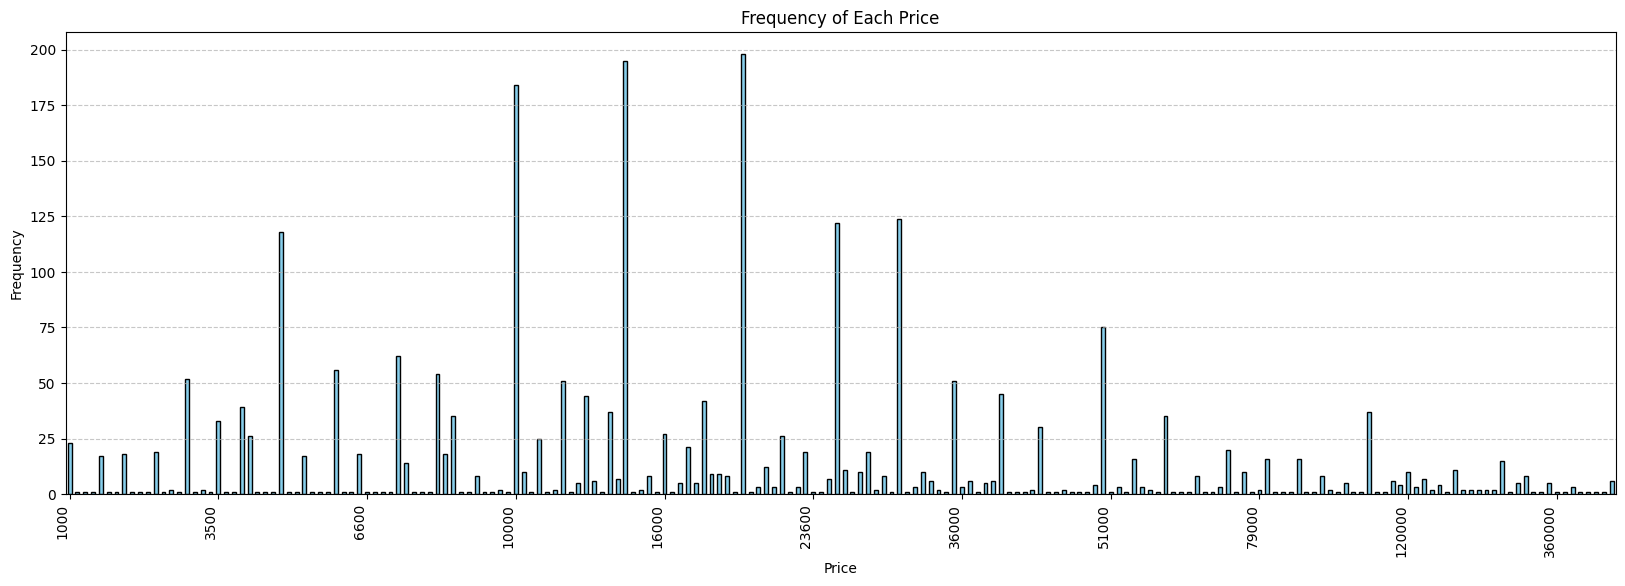

In [61]:
price_counts = df['price'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Frequency of Each Price')

plt.xticks(rotation=90, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(0, len(price_counts), max(1, len(price_counts)//10)))

plt.show()

#### Prices with each plate_no_length

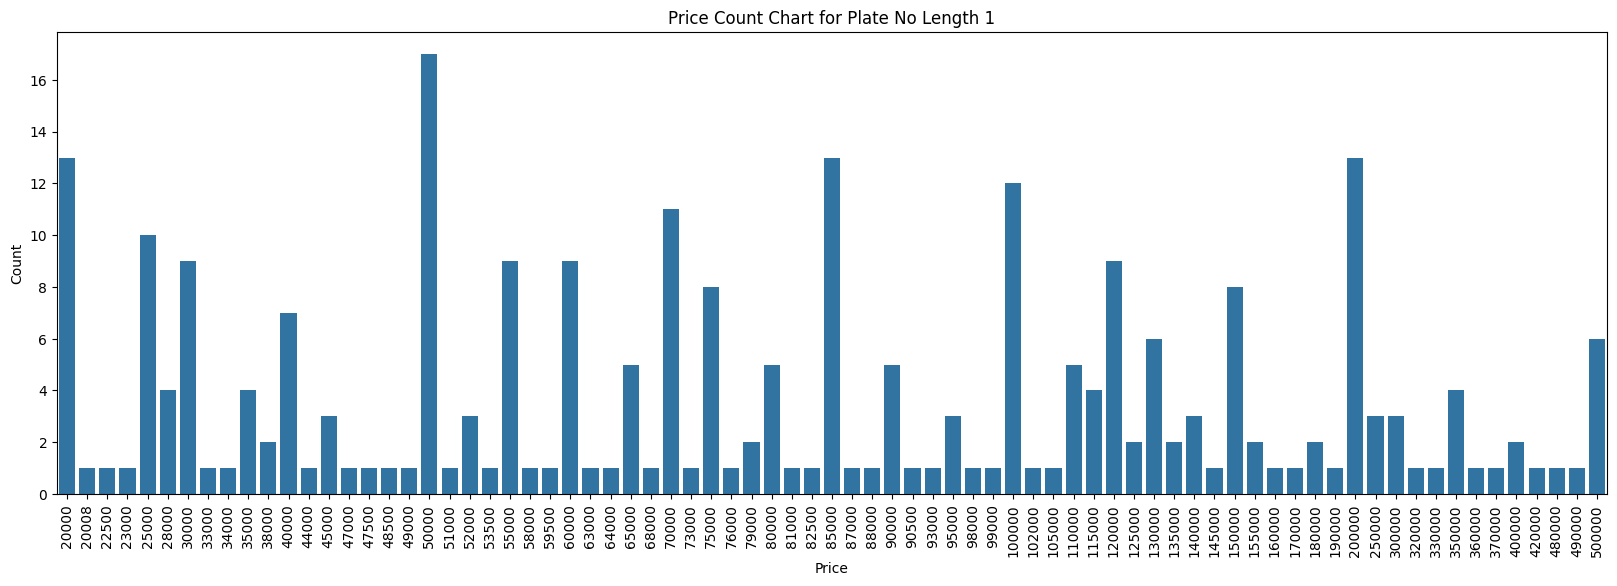

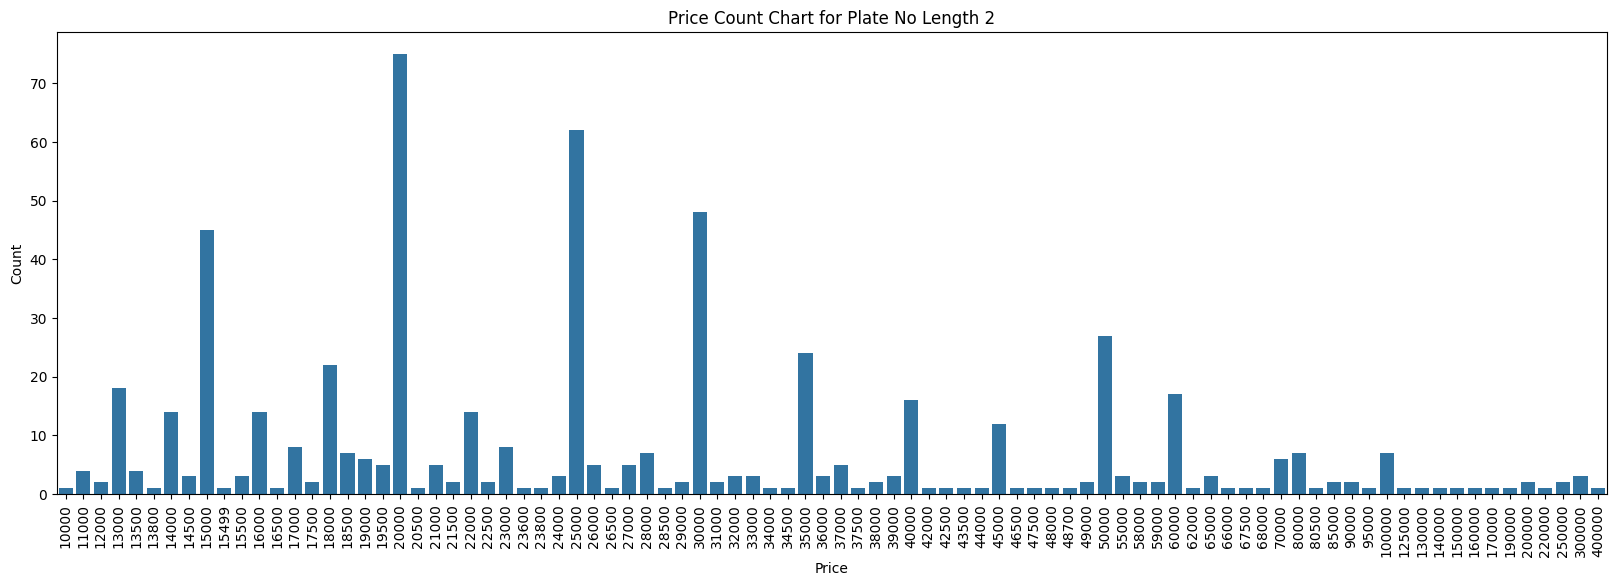

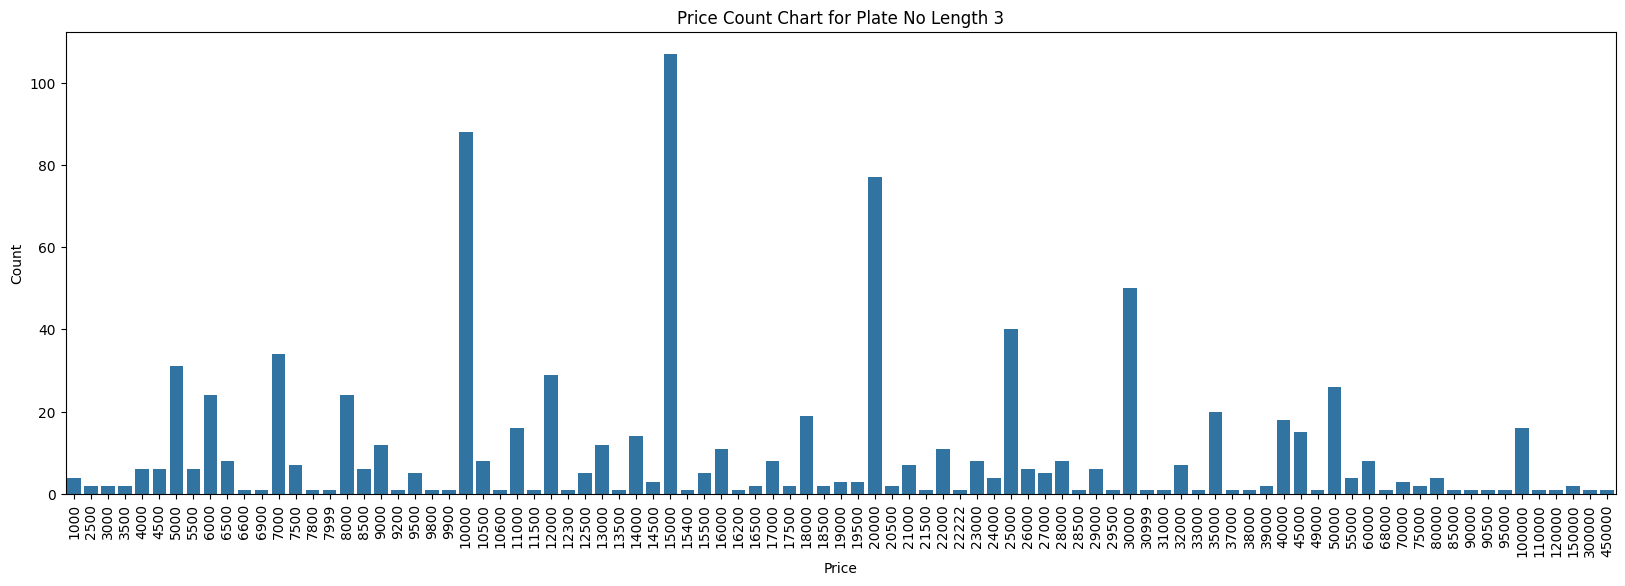

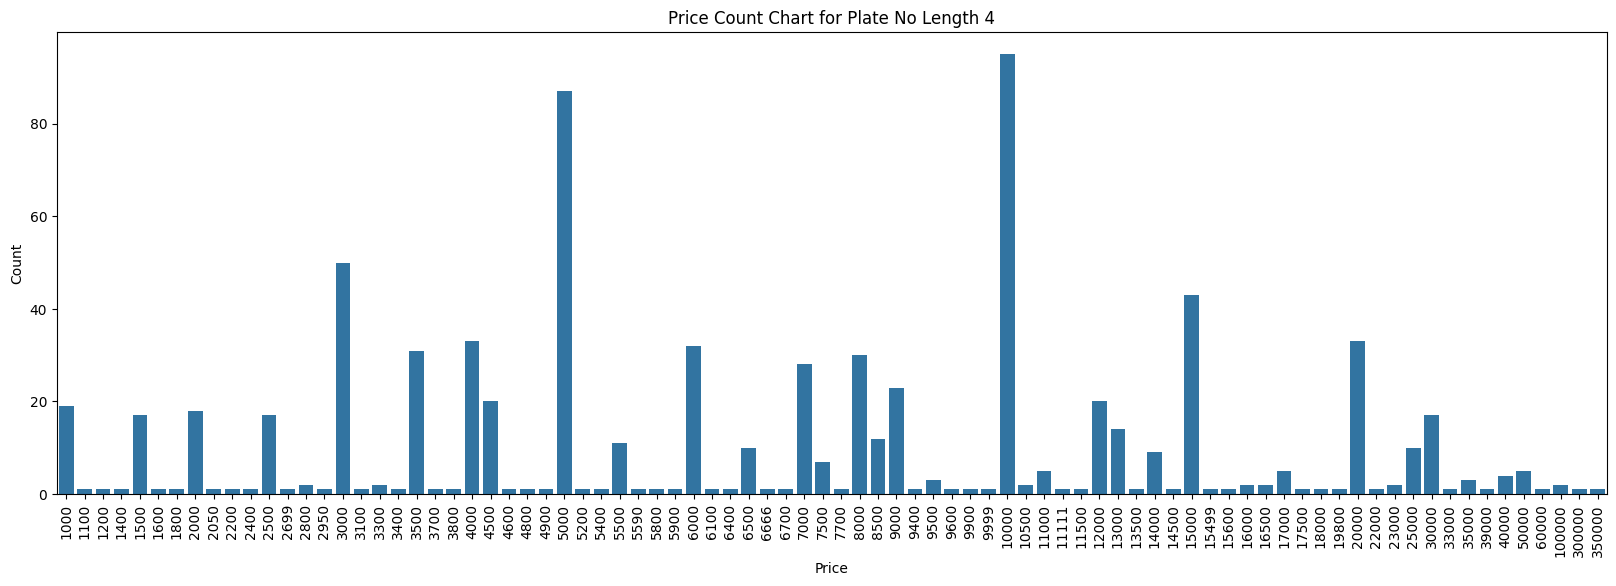

In [62]:
for x in df['plate_no_length'].unique():
    df_figure = df[df['plate_no_length'] == x]  # Filter data for each plate_no_length

    plt.figure(figsize=(20, 6))
    sns.countplot(x=df_figure['price'])

    plt.xlabel("Price")
    plt.ylabel("Count")
    plt.title(f"Price Count Chart for Plate No Length {x}")
    plt.xticks(rotation=90)  # Rotate labels for better readability

    plt.show()

#### Price with on digit

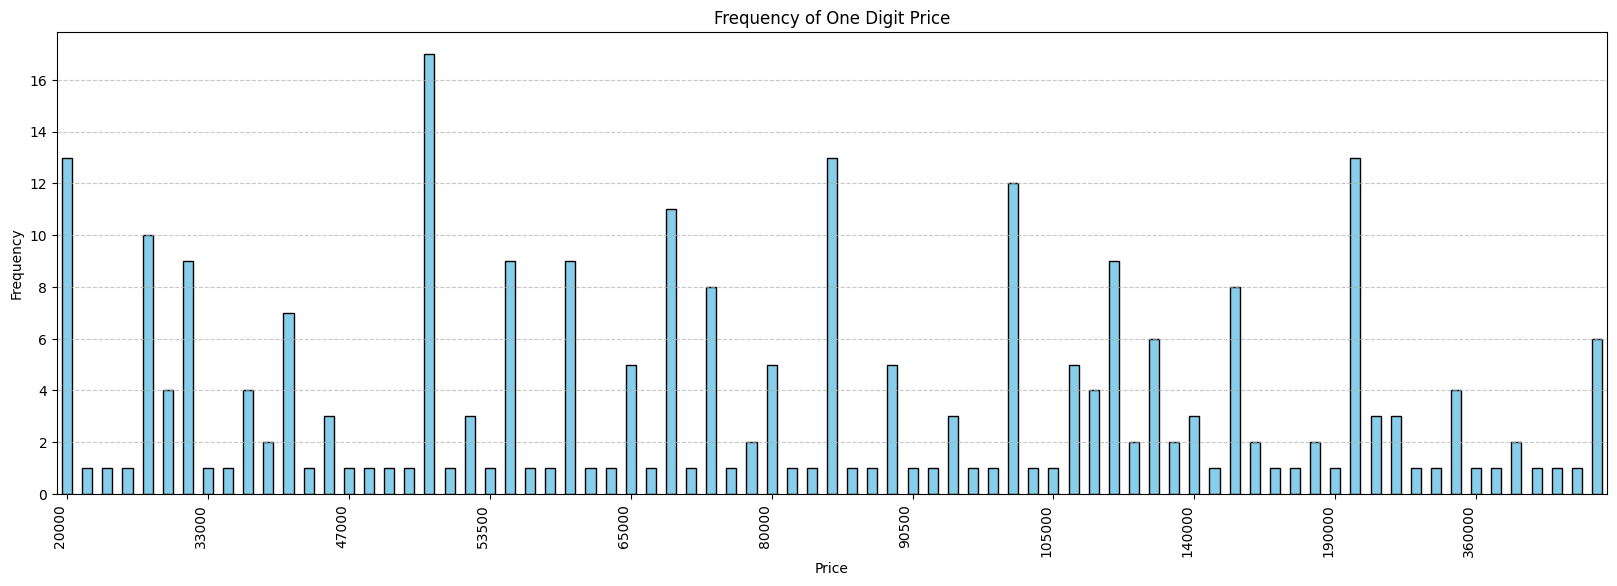

In [63]:
price_counts = df[df['One Digit']]['price'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Frequency of One Digit Price')

plt.xticks(rotation=90, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(0, len(price_counts), max(1, len(price_counts)//10)))

plt.show()

#### Price with Two digit (Different)

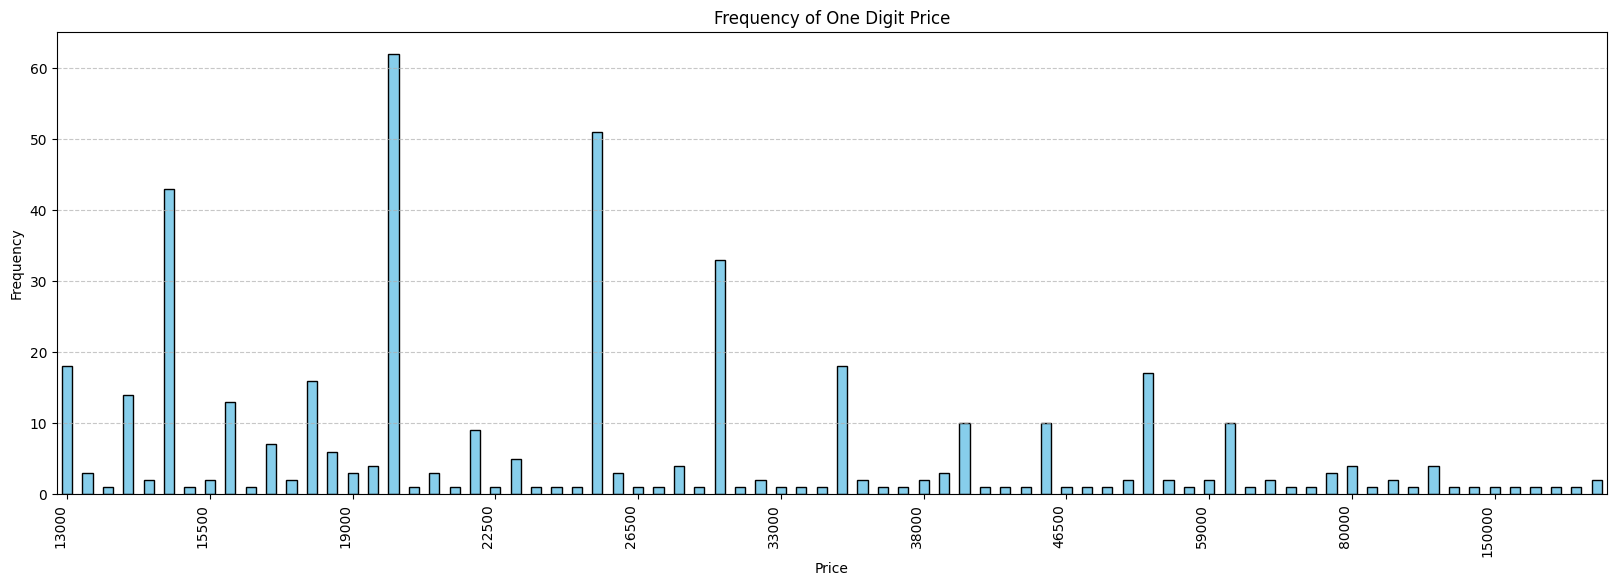

In [64]:
price_counts = df[df['Two Digits (Different)']]['price'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Frequency of One Digit Price')

plt.xticks(rotation=90, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(0, len(price_counts), max(1, len(price_counts)//10)))

plt.show()

#### Price with Two digit (Same)

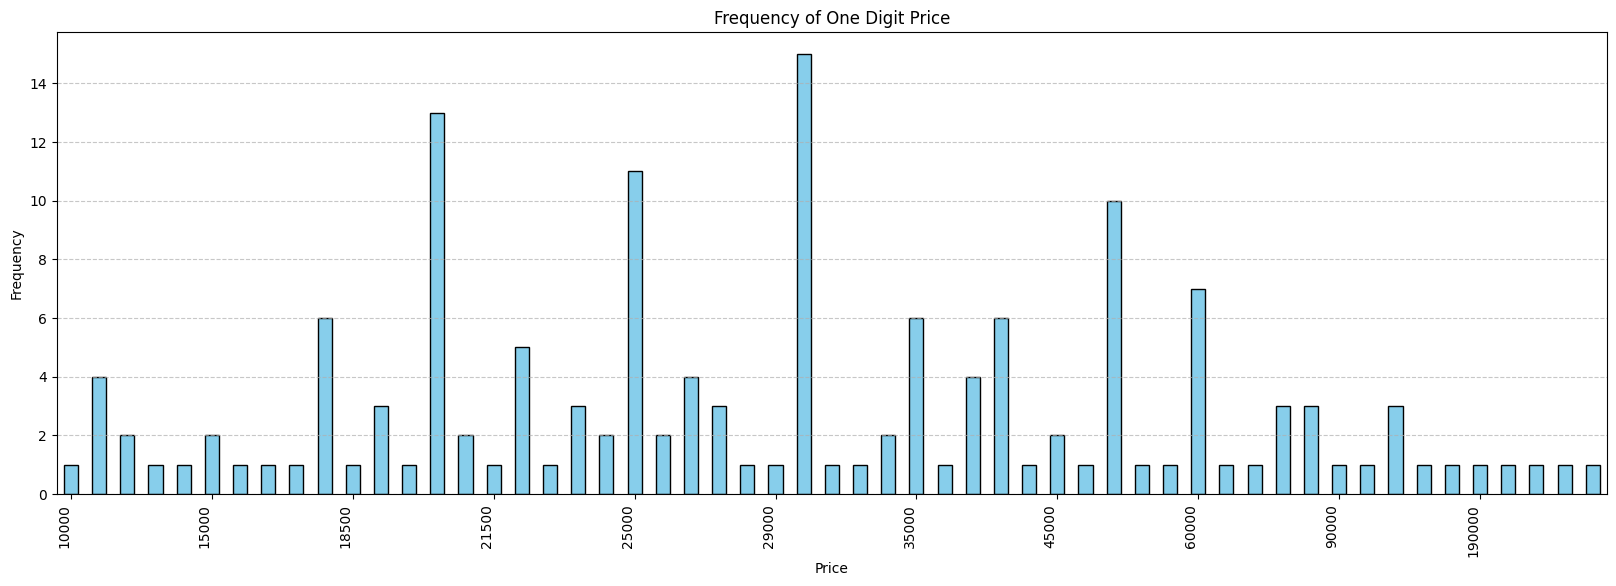

In [65]:
price_counts = df[df['Two Digits (Same)']]['price'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Frequency of One Digit Price')

plt.xticks(rotation=90, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(0, len(price_counts), max(1, len(price_counts)//10)))

plt.show()

#### Price with Three Digits (Different)

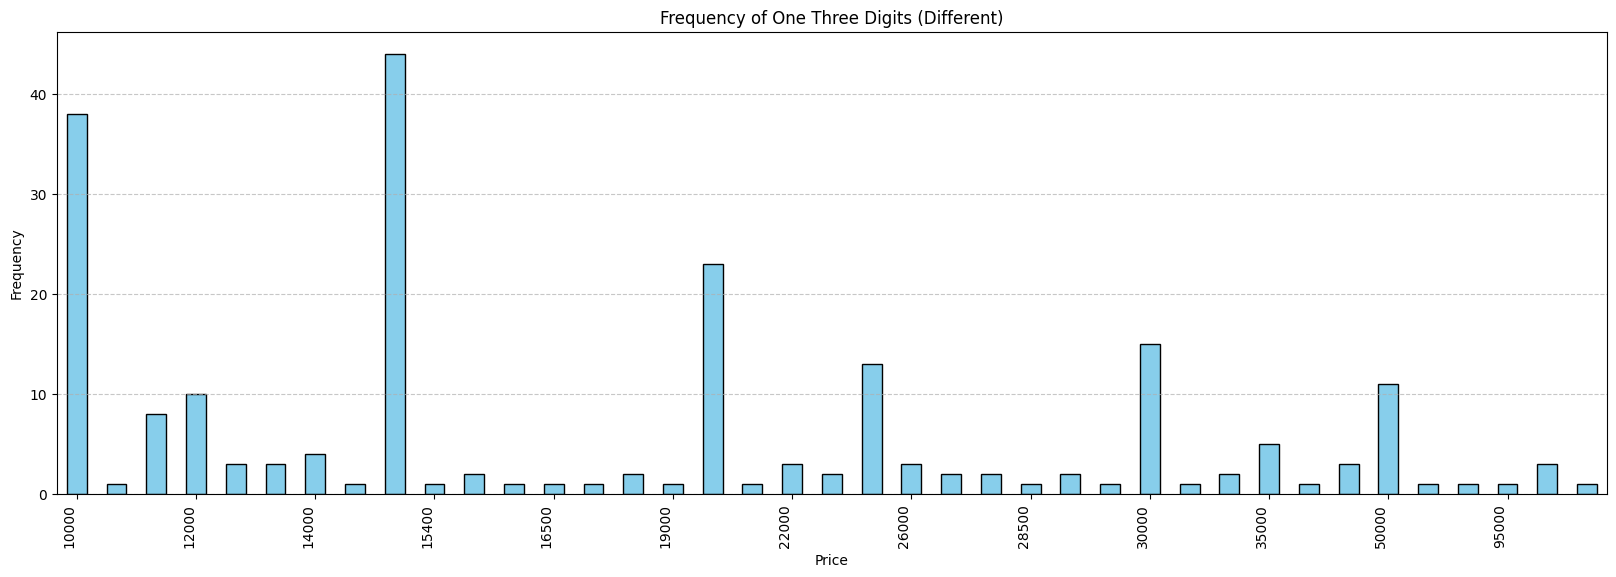

In [66]:
price_counts = df[df['Three Digits (Different)']]['price'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Frequency of One Three Digits (Different)')

plt.xticks(rotation=90, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(0, len(price_counts), max(1, len(price_counts)//10)))

plt.show()

#### Price with Three Digits (Same)

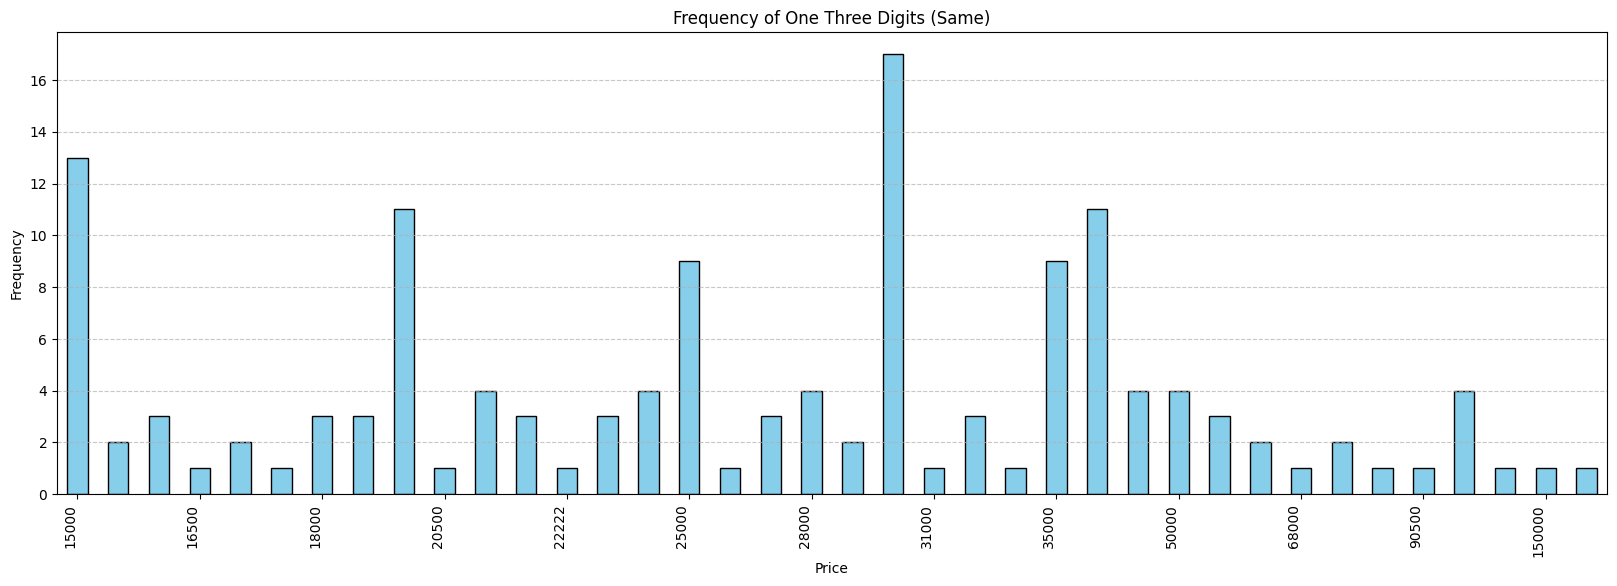

In [67]:
price_counts = df[df['Three Digits (Same)']]['price'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Frequency of One Three Digits (Same)')

plt.xticks(rotation=90, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(0, len(price_counts), max(1, len(price_counts)//10)))

plt.show()

#### Price with Four Digits (Different)

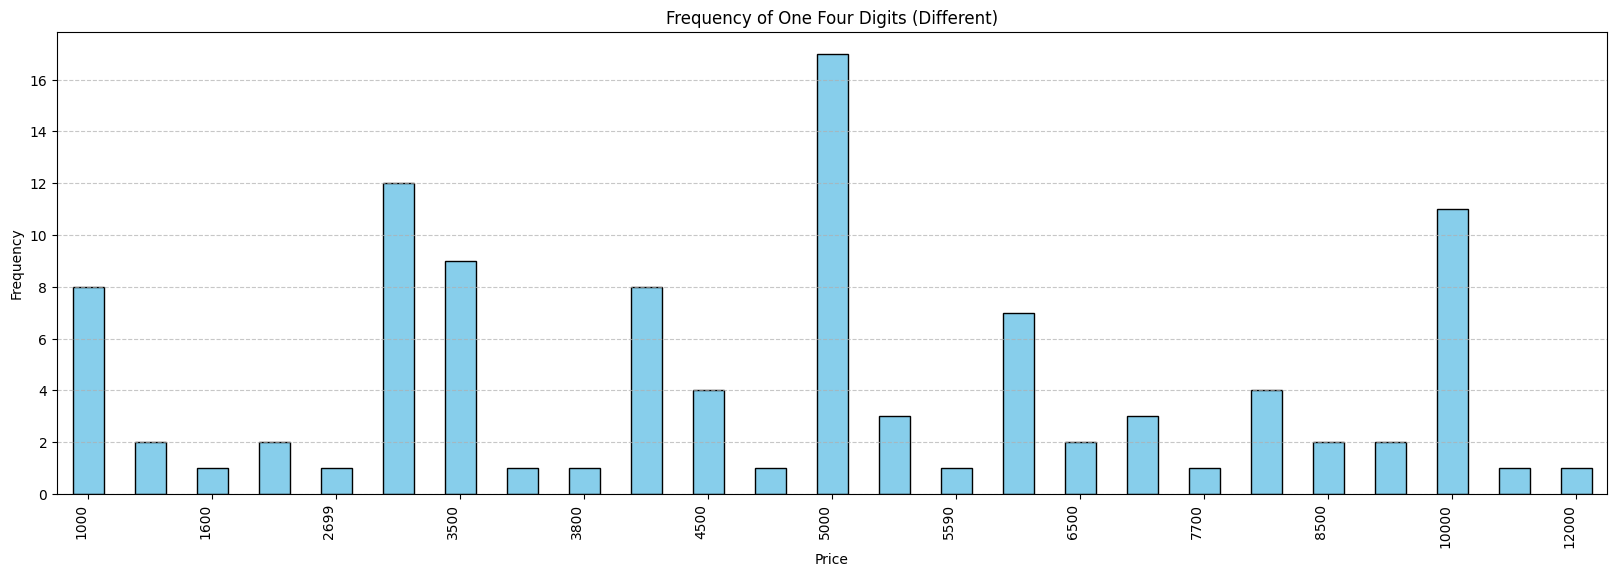

In [68]:
price_counts = df[df['Four Digits (Different)']]['price'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Frequency of One Four Digits (Different)')

plt.xticks(rotation=90, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(0, len(price_counts), max(1, len(price_counts)//10)))

plt.show()

In [75]:
pd.set_option('display.max_columns', None)
df[df['Four Digits (Different)']].sort_values('price').tail(10)

,char_ar,char_en,char1_ar,char2_ar,char3_ar,char1_en,char2_en,char3_en,plate_no,price,class,plate_no_length,similar_digits,sepcial_date,saudi_tribes,One Digit,Two Digits (Same),Two Digits (Different),Three Digits (Same),Three Digits (Different),Four Digits (Same),Four Digits (Different),emergency_no,in_order,reversed_order,same_middles_no,plaindromic_no,same_first_last_no,same_two_sides,one_digit_zero,one_digit_one,one_digit_two,one_digit_three,one_digit_four,one_digit_five,one_digit_six,one_digit_seven,one_digit_eight,one_digit_nine,is_triple_letters,is_one_letters,First_Third_Match,is_sequence,Contains_Tribe,contains_special_words,contains_special_cars,connect_12,connect_23,combined_word,word_freq_score,first_name_rank,result
1288,ح و ر,R U J,ح,و,ر,J,U,R,7569,10000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,حور,58.326143,95.758929,False
3491,ح و ر,R U J,ح,و,ر,J,U,R,6305,10000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,حور,58.326143,95.758929,False
3247,ح ل و,U L J,ح,ل,و,J,L,U,4317,10000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,حلو,89.301122,86.979167,False
3382,ح ب ل,L B J,ح,ب,ل,J,B,L,6075,10000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,حبل,71.786022,19.717262,False
3513,ب ن و,U N B,ب,ن,و,B,N,U,3057,10000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,بنو,71.872304,71.577381,False
1908,أ ن أ,A N A,أ,ن,أ,A,N,A,2016,10000,NaN,4,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,أنأ,98.792062,98.437500,True
702,ر ن أ,A N R,ر,ن,أ,R,N,A,1234,10000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,رنأ,67.687662,97.247024,True
2328,ح م د,D Z J,ح,م,د,J,Z,D,1390,10000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,حمد,89.042278,99.404762,False
499,د أ د,D A D,د,أ,د,D,A,D,3578,11000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,دأد,14.797239,73.214286,True
3326,س ع د,D E S,س,ع,د,S,E,D,6549,12000,NaN,4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,سعد,93.572045,99.553571,False


#### Price with Four Digits (Same)

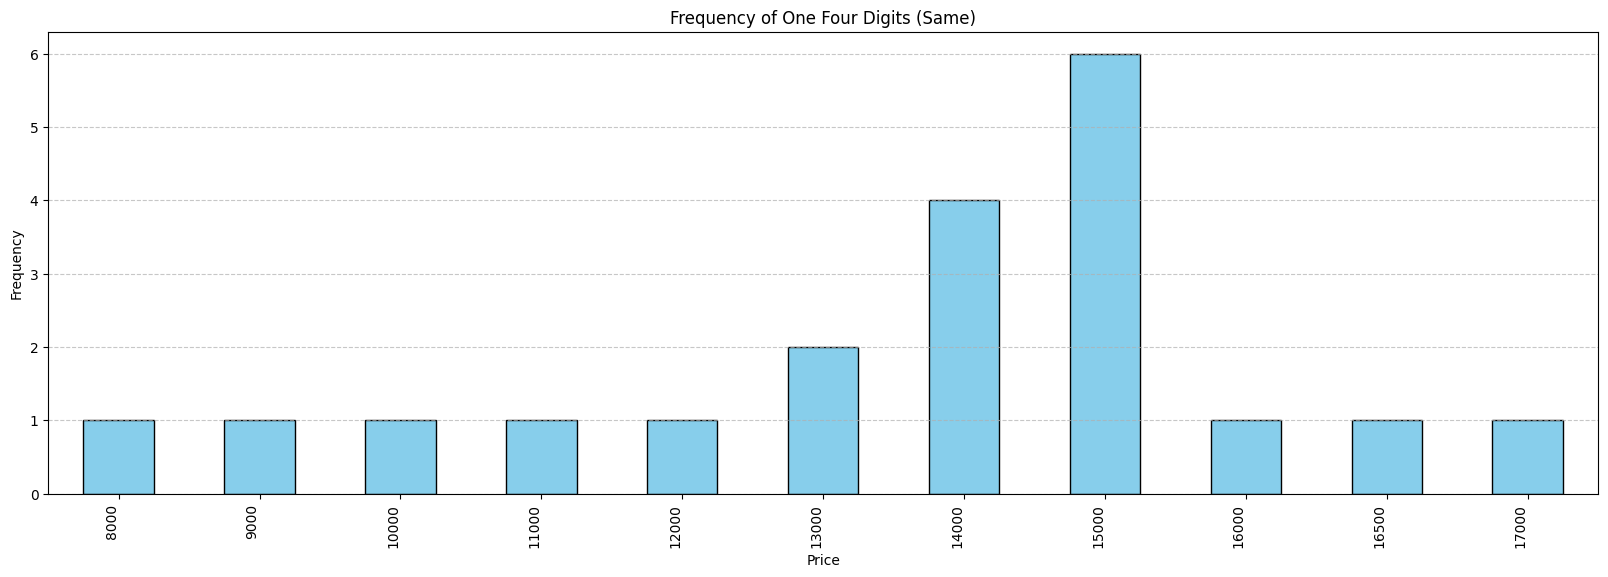

In [796]:
price_counts = df[df['Four Digits (Same)']]['price'].value_counts().sort_index()
plt.figure(figsize=(20, 6))
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Frequency of One Four Digits (Same)')

plt.xticks(rotation=90, ha='right') 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(ticks=range(0, len(price_counts), max(1, len(price_counts)//10)))

plt.show()

## 4. Bivariate/Multivariate Analysis:

In [97]:
df.shape

(3067, 52)

In [798]:
corr_matrix['price'].sort_values(ascending=False)

price                       1.000000
one_digit_one               0.217051
One Digit                   0.205867
in_order                    0.196056
reversed_order              0.187405
similar_digits              0.179658
one_digit_seven             0.089795
saudi_tribes                0.071774
one_digit_three             0.068458
Three Digits (Same)         0.064995
Contains_Tribe              0.060313
one_digit_two               0.056167
one_digit_nine              0.035998
one_digit_six               0.023213
one_digit_four              0.020397
one_digit_five              0.019926
plaindromic_no              0.014347
one_digit_eight             0.014279
first_name_rank             0.002420
same_first_last_no          0.001655
word_freq_score             0.000737
emergency_no               -0.000890
Two Digits (Same)          -0.002445
contains_special_words     -0.005998
is_triple_letters          -0.008889
sepcial_date               -0.011848
Four Digits (Same)         -0.013149
F

## Save clean data

In [98]:
df.to_csv('data/data.csv',index=False)